In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [142]:
data = pd.read_csv("loan-train.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# DATA UNDERSTANDING & CLEANING

In [143]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [144]:

data.describe(include='object')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [145]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [146]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

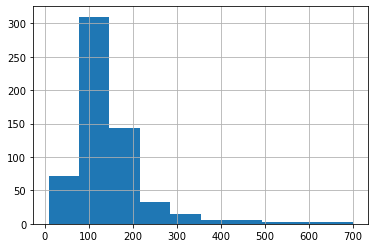

In [147]:
data["LoanAmount"].hist()

In [148]:
# The loan amount column is right skewed so nulls are filled with medain value.
data["LoanAmount"].fillna(data["LoanAmount"].median(), inplace = True)

In [149]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [150]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [151]:
data['Loan_Amount_Term'].mode()


0    360.0
Name: Loan_Amount_Term, dtype: float64

In [152]:
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(360)


In [153]:
data['Dependents'].mode()


0    0
Name: Dependents, dtype: object

In [154]:
data['Dependents'] = data['Dependents'].fillna('0')

In [155]:
data['Credit_History'].mode()

0    1.0
Name: Credit_History, dtype: float64

In [156]:
data['Credit_History'] = data['Credit_History'].fillna(1.0)

In [157]:
data['Self_Employed'].mode()

0    No
Name: Self_Employed, dtype: object

In [158]:
data['Self_Employed'] = data['Self_Employed'].fillna("No")

In [159]:
data.dropna(inplace = True)

In [160]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [161]:
data.drop(['Loan_ID'], axis=1,inplace = True)

In [162]:
# Final Dataframe
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# DATA VISUALIZATION

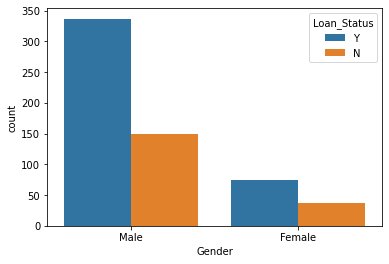

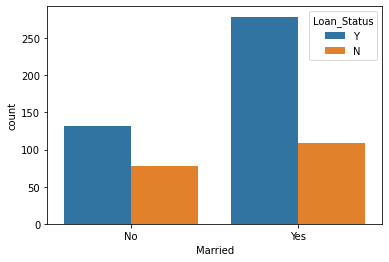

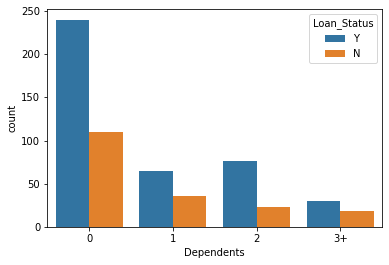

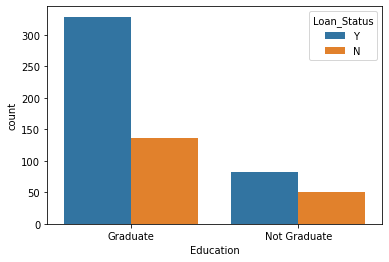

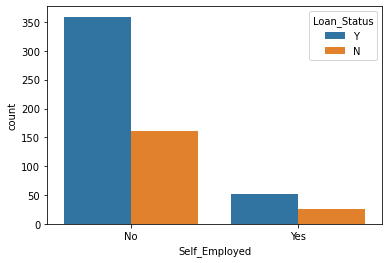

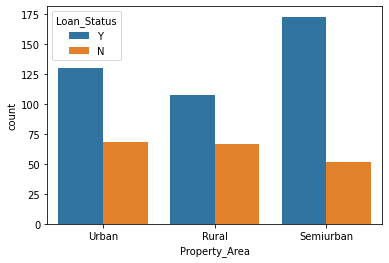

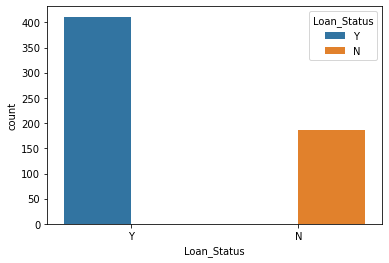

In [163]:

for col in data.select_dtypes(include='object'):
    sns.countplot(x=col, data=data, hue = 'Loan_Status' )
    plt.show()

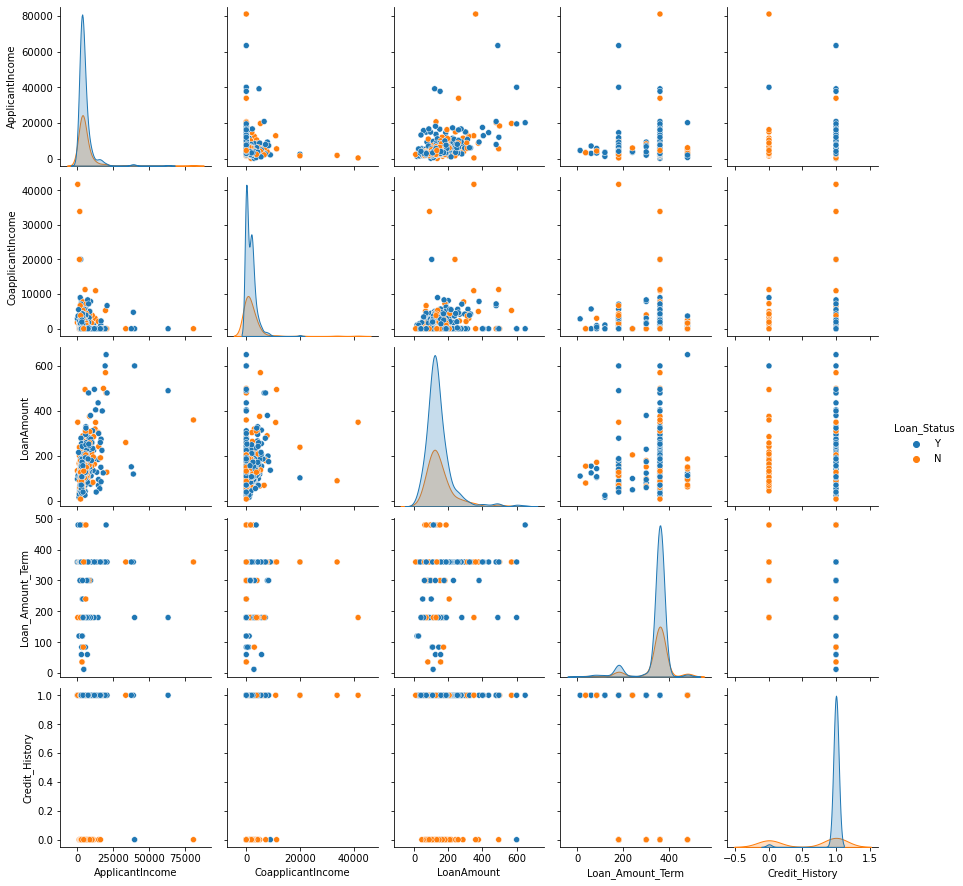

In [164]:
sns.pairplot(data, hue= 'Loan_Status')

# ENCODING

In [165]:
data.head(1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y


In [166]:
dummies1 = pd.get_dummies(data["Gender"])
data= pd.concat([data,dummies1], axis=1)
data = data.drop('Gender',axis=1)

In [167]:
data["Married"].unique()

array(['No', 'Yes'], dtype=object)

In [168]:
data.Married = data.Married.map({"No":0,"Yes":1})

In [169]:
data["Education"].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [170]:
data.Education = data.Education.map({"Not Graduate":0,"Graduate":1})

In [171]:
data["Dependents"].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [172]:
data.Dependents = data.Dependents.map({"3+":0,"2":1,"1":2,"0":3})

In [173]:
data["Property_Area"].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [174]:
data.Property_Area = data.Property_Area.map({"Rural":0,"Semiurban":1,"Urban":2})

In [175]:
dummies1 = pd.get_dummies(data["Self_Employed"])
data= pd.concat([data,dummies1], axis=1)
data = data.drop('Self_Employed',axis=1)

In [176]:
data["Loan_Status"].unique()

array(['Y', 'N'], dtype=object)

In [177]:
data.Loan_Status = data.Loan_Status.map({"N":0,"Y":1})

In [178]:
data.head()

,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Female,Male,No,Yes
0,0,3,1,5849,0.0,128.0,360.0,1.0,2,1,0,1,1,0
1,1,2,1,4583,1508.0,128.0,360.0,1.0,0,0,0,1,1,0
2,1,3,1,3000,0.0,66.0,360.0,1.0,2,1,0,1,0,1
3,1,3,0,2583,2358.0,120.0,360.0,1.0,2,1,0,1,1,0
4,0,3,1,6000,0.0,141.0,360.0,1.0,2,1,0,1,1,0


In [179]:
data.columns

Index(['Married', 'Dependents', 'Education', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area', 'Loan_Status', 'Female', 'Male', 'No', 'Yes'],
      dtype='object')

In [180]:
X = data[['Married', 'Dependents', 'Education', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Female', 'Male', 'No', 'Yes']].values
y = data[['Loan_Status']].values

In [181]:
# train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [182]:
# scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train, y_train) # find mean and standard deviation

X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)

# ML Algorithms

## KNN Classifier

In [183]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix, f1_score

K = []

for i in [1,2,3,4,5,6,7,8,9,10,15,20,30]: # looping to find best K
    knn = KNeighborsClassifier(i) #initialising the model
    knn.fit(X_train,y_train) # training the model

    K.append({'K Value' : i, 'Cross_val_Score': np.mean(cross_val_score(knn, X_train, y_train)).round(5)})
    score = pd.DataFrame(K, columns = ['K Value', 'Cross_val_Score'])

score.sort_values(by = 'Cross_val_Score', ascending = False).head()

C:\Users\Brinda\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Brinda\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Brinda\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Brinda\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

,K Value,Cross_val_Score
8,9,0.77241
11,20,0.77241
4,5,0.77236
9,10,0.77236
6,7,0.77019


In [184]:
knn = KNeighborsClassifier(9)
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)

print('Accuracy :', knn.score(X_test,y_test).round(3),
        '\nf1-score :', f1_score(y_test, y_pred).round(3),
        '\nAUROC :', roc_auc_score(y_test, y_pred).round(3))



Accuracy : 0.793 
f1-score : 0.87 
AUROC : 0.66


C:\Users\Brinda\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


## Decision Tree Classifier

In [185]:
from sklearn.tree import DecisionTreeClassifier

DT = []

for depth in [1,2,3,4,5,6,7,8,9,10,20]:
  dt = DecisionTreeClassifier(max_depth=depth)
  dt.fit(X_train, y_train)
  valAccuracy = cross_val_score(dt, X_train, y_train)
  DT.append({'Depth' : depth, 'Cross_val_Score': np.mean(valAccuracy).round(5)})
  score = pd.DataFrame(DT, columns = ['Depth', 'Cross_val_Score'])

score.sort_values(by = 'Cross_val_Score', ascending = False).head()

,Depth,Cross_val_Score
0,1,0.80130
1,2,0.79011
2,3,0.78122
3,4,0.77456
4,5,0.76789


In [186]:
dt = DecisionTreeClassifier(max_depth=1)
dt.fit(X_train,y_train)

y_pred = dt.predict(X_test)

print('Accuracy :', dt.score(X_test,y_test).round(3),
        '\nf1-score :', f1_score(y_test, y_pred).round(3),
        '\nAUROC :', roc_auc_score(y_test, y_pred).round(3))

Accuracy : 0.827 
f1-score : 0.892 
AUROC : 0.699


## Random Forest Classifier

In [187]:
from sklearn.ensemble import RandomForestClassifier

depth = int(np.log(10)/np.log(2)) # log2(number of features)

rf = RandomForestClassifier(max_depth= depth, max_features = 'sqrt')
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print('Accuracy :', dt.score(X_test,y_test).round(3),
        '\nf1-score :', f1_score(y_test, y_pred).round(3),
        '\nAUROC :', roc_auc_score(y_test, y_pred).round(3))

Accuracy : 0.827 
f1-score : 0.892 
AUROC : 0.699


C:\Users\Brinda\AppData\Local\Temp\ipykernel_6192\4254949824.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


## XG BOOST Classifier

In [188]:
import xgboost as xgb

XG = []

for lr in [0.01,0.05,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  XGB = xgb.XGBClassifier(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model
  XGB.fit(X_train,y_train) #train the model
  print("Learning rate : ", lr," Cross-Val score : ", np.mean(cross_val_score(XGB, X_train, y_train, cv=10)).round(4))

Learning rate :  0.01  Cross-Val score :  0.7879
Learning rate :  0.05  Cross-Val score :  0.7815
Learning rate :  0.1  Cross-Val score :  0.7656
Learning rate :  0.11  Cross-Val score :  0.7679
Learning rate :  0.12  Cross-Val score :  0.7591
Learning rate :  0.13  Cross-Val score :  0.7703
Learning rate :  0.14  Cross-Val score :  0.7456
Learning rate :  0.15  Cross-Val score :  0.7523
Learning rate :  0.2  Cross-Val score :  0.7634
Learning rate :  0.5  Cross-Val score :  0.7479
Learning rate :  0.7  Cross-Val score :  0.7257
Learning rate :  1  Cross-Val score :  0.7456


In [189]:
XGB = xgb.XGBClassifier(learning_rate = .05, n_estimators=100)
XGB.fit(X_train,y_train) #train the model

X_test = pd.DataFrame(X_test)
y_pred = XGB.predict(X_test)

print('Accuracy :', XGB.score(X_test,y_test).round(3),
        '\nf1-score :', f1_score(y_test, y_pred).round(3),
        '\nAUROC :', roc_auc_score(y_test, y_pred).round(3))

Accuracy : 0.78 
f1-score : 0.857 
AUROC : 0.675
